In [2]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import signal
import math
from scipy.interpolate import make_interp_spline, BSpline

# Processing of the resample image

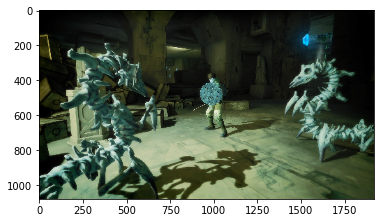

In [3]:
im_file = "./resampled.png"
im = cv2.imread(im_file)
plt.imshow(im)

(1080, 1920)


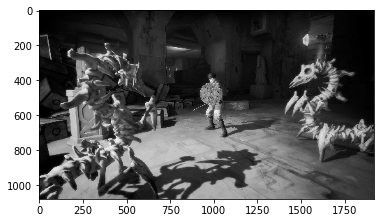

In [4]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im.shape)
plt.imshow(im, cmap='gray')

In [5]:
dx, dy = cv2.spatialGradient(im)
print(dx.shape)
print(np.min(dx))
print(np.max(dx))
print(np.min(dy))
print(np.max(dy))

(1080, 1920)
-491
681
-448
607


True

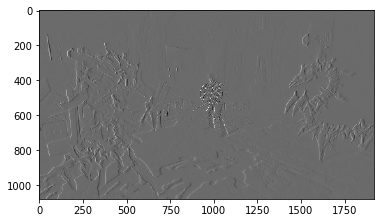

In [6]:
plt.imshow(dx, cmap='gray')
cv2.imwrite("./resample/im_dx.jpg", dx)

True

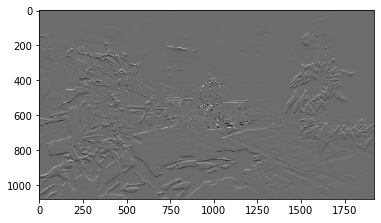

In [209]:
plt.imshow(dy, cmap='gray')
cv2.imwrite("./resample/im_dy.jpg", dy)

True

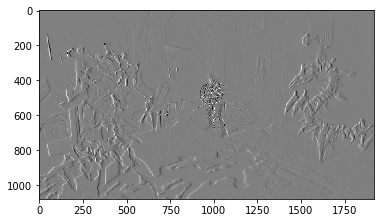

In [210]:
dx_amp = dx * 100
plt.imshow(dx_amp, cmap='gray')
cv2.imwrite("./resample/im_dx_amp.jpg", dx_amp)

True

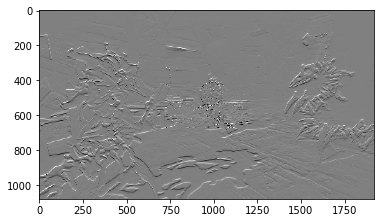

In [211]:
dy_amp = dy * 100
plt.imshow(dy_amp, cmap='gray')
cv2.imwrite("./resample/im_dy_amp.jpg", dy_amp)

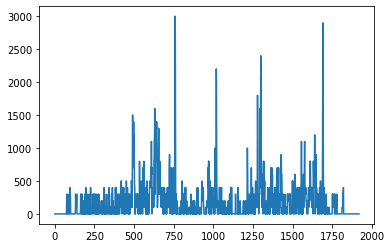

In [212]:
plt.plot(abs(dx_amp[40]))
plt.savefig("./resample/dx_amp[40]")

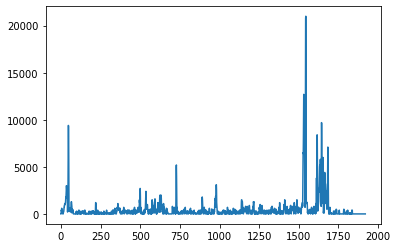

In [213]:
plt.plot(abs(dx_amp[140]))
plt.savefig("./resample/dx_amp[140]")

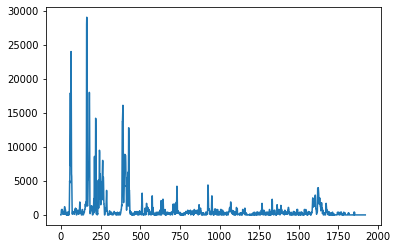

In [214]:
plt.plot(abs(dx_amp[240]))
plt.savefig("./resample/dx_amp[240]")

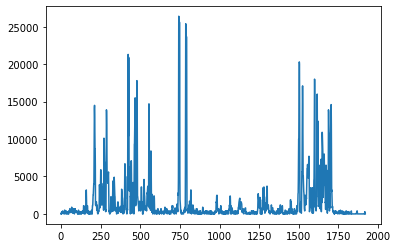

In [215]:
plt.plot(abs(dx_amp[340]))
plt.savefig("./resample/dx_amp[340]")

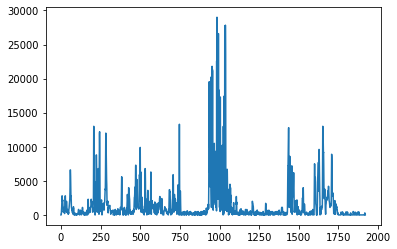

In [216]:
# In the area of high resolution
plt.plot(abs(dx_amp[440]))
plt.savefig("./resample/dx_amp[440]")

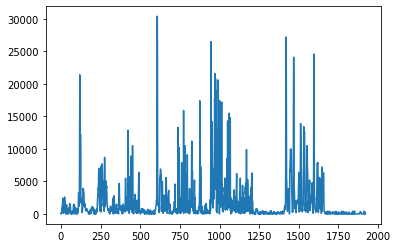

In [217]:
# In the area of high resolution
plt.plot(abs(dx_amp[540]))
plt.savefig("./resample/dx_amp[540]")

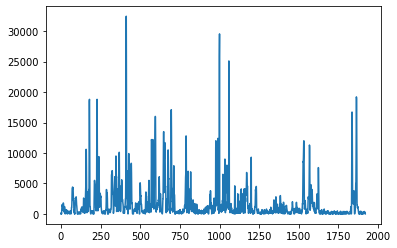

In [218]:
# In the area of high resolution
plt.plot(abs(dx_amp[640]))
plt.savefig("./resample/dx_amp[640]")

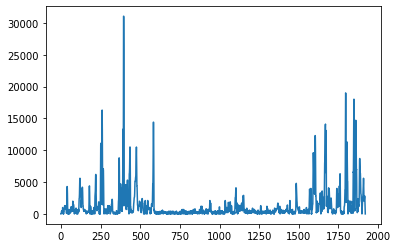

In [219]:
plt.plot(abs(dx_amp[740]))
plt.savefig("./resample/dx_amp[740]")

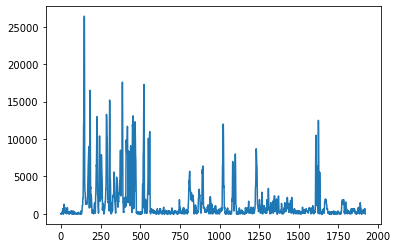

In [220]:
plt.plot(abs(dx_amp[840]))
plt.savefig("./resample/dx_amp[840]")

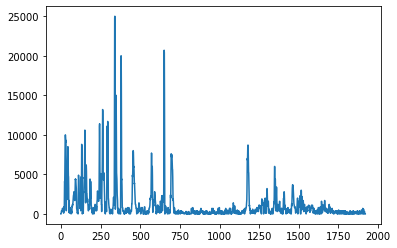

In [221]:
plt.plot(abs(dx_amp[940]))
plt.savefig("./resample/dx_amp[940]")

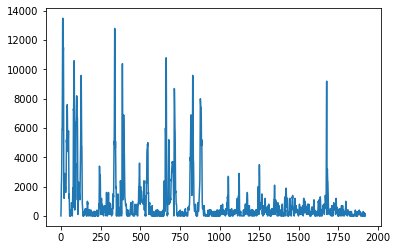

In [222]:
plt.plot(abs(dx_amp[1040]))
plt.savefig("./resample/dx_amp[1040]")

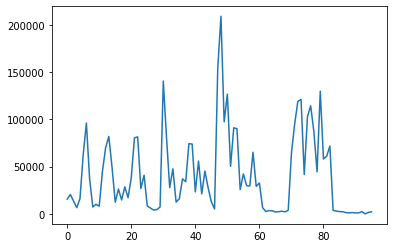

In [223]:
interval = 20
list = []
sum = 0
for i in range(1920):
    sum += abs(dx_amp[540][i])
    if (i % interval == (interval - 1)):
        list.append(sum)
        sum = 0
plt.plot(list)

# Comparison of average gradient intensity in high/low resolution area

In [224]:
print(dx_amp.shape)
print(dy_amp.shape)

(1080, 1920)
(1080, 1920)


In [225]:
ct_low_x = 0
ct_high_x = 0

sum_low_x = 0
sum_high_x = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_x += 1
            sum_high_x += abs(dx_amp[i][j])
        else:
            ct_low_x += 1
            sum_low_x += abs(dx_amp[i][j])

In [226]:
avg_intensity_low_x = sum_low_x / ct_low_x
avg_intensity_high_x = sum_high_x / ct_high_x
print(avg_intensity_low_x)
print(avg_intensity_high_x)

1224.7642242798354
2175.7216975308643


In [227]:
ct_low_y = 0
ct_high_y = 0

sum_low_y = 0
sum_high_y = 0

for i in range(1080):
    for j in range(1920):
        if ((i in range(405, 675)) and (j in range(720, 1200))):
            ct_high_y += 1
            sum_high_y += abs(dy_amp[i][j])
        else:
            ct_low_y += 1
            sum_low_y += abs(dy_amp[i][j])

In [228]:
avg_intensity_low_y = sum_low_y / ct_low_y
avg_intensity_high_y = sum_high_y / ct_high_y
print(avg_intensity_low_y)
print(avg_intensity_high_y)

1421.8549320987654
2468.5029320987655


In [229]:
print(avg_intensity_high_x / avg_intensity_low_x)
print(avg_intensity_high_y / avg_intensity_low_y)

1.7764412565285326
1.736114477202726


[2453.54761905 1583.83169082 1112.64757202 1227.63901024]


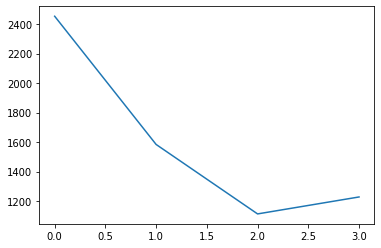

In [230]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 30

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)

[2262.4907684  1304.95742507 1336.98368146 1224.05224502]


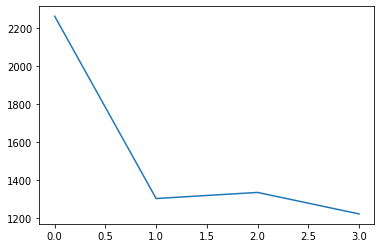

In [231]:
ct = np.array([0, 0, 0, 0])
sum = np.array([0, 0, 0, 0])
w = 8

for i in range(1080):
    for j in range(1920):
        if ((i in range(405 + w, 675 - w)) and (j in range(720 + w, 1200 - w))):
            ct[0] += 1
            sum[0] += abs(dx_amp[i][j])
        elif ((i in range(405, 675)) and (j in range(720, 1200))):
            ct[1] += 1
            sum[1] += abs(dx_amp[i][j])
        elif ((i in range(405 - w, 675 + w)) and (j in range(720 - w, 1200 + w))):
            ct[2] += 1
            sum[2] += abs(dx_amp[i][j])
        else:
            ct[3] += 1
            sum[3] += abs(dx_amp[i][j])
avg = sum / ct
print(avg)
plt.plot(avg)

In [39]:
res = np.zeros([9, 4])

In [40]:
res[0] = [2262.4907684, 1304.95742507, 1336.98368146, 1224.05224502]
res[1] = [2262.4907684, 1291.96662125, 1671.7868799, 1617.16245838]
res[2] = [1475.54680288, 853.39509537, 780.00163185, 805.64267315]
# res[3] = [2272.34662639, 1212.88249319, 1312.88120104, 1225.17342671]
res[3] = [2262.35416101, 1148.35762943, 1285.63968668, 1224.05410862]
res[4] = [2262.50604127, 1291.25613079, 1330.82343342, 1224.05369449]
res[5] = [2262.2455539, 1080.61716621, 1301.8113577, 1224.05224502]
res[6] = [2262.39997964, 1204.64543597, 1311.22486945, 1224.05265915]
res[7] = [2262.21361662, 1123.30483651, 1255.78263708, 1224.2184161]
res[8] = [2261.45221287, 1020.54938692, 1217.10182768, 1224.20216136]

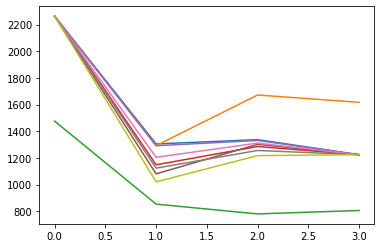

In [41]:
# x = [1, 2, 3, 4]
plt.plot(np.transpose(res))

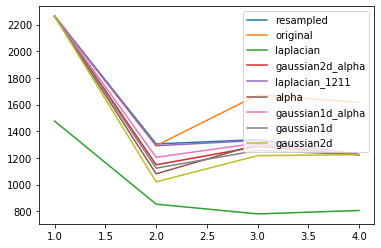

In [43]:
plt.plot([1, 2, 3, 4], res[0], label = 'resampled')
plt.plot([1, 2, 3, 4], res[1], label = 'original')
plt.plot([1, 2, 3, 4], res[2], label = 'laplacian')
plt.plot([1, 2, 3, 4], res[3], label = 'gaussian2d_alpha')
plt.plot([1, 2, 3, 4], res[4], label = 'laplacian_1211')
plt.plot([1, 2, 3, 4], res[5], label = 'alpha')
plt.plot([1, 2, 3, 4], res[6], label = 'gaussian1d_alpha')
plt.plot([1, 2, 3, 4], res[7], label = 'gaussian1d')
plt.plot([1, 2, 3, 4], res[8], label = 'gaussian2d')

plt.legend()
plt.savefig("./comparison_1")

In [44]:
res[0] = [2262.4907684, 1304.95742507, 1336.98368146, 1224.05224502]
res[1] = [2262.4907684, 1291.96662125, 1671.7868799, 1617.16245838]
res[2] = [1475.54680288, 853.39509537, 780.00163185, 805.64267315]
res[3] = [2262.35416101, 1148.35762943, 1285.63968668, 1224.05410862]
res[4] = [2262.50604127, 1291.25613079, 1330.82343342, 1224.05369449]
res[5] = [2262.2455539, 1080.61716621, 1301.8113577, 1224.05224502]
res[6] = [2262.39997964, 1204.64543597, 1311.22486945, 1224.05265915]
res[7] = [2262.21361662, 1123.30483651, 1255.78263708, 1224.2184161]
res[8] = [2261.45221287, 1020.54938692, 1217.10182768, 1224.20216136]

resampled
original
alpha
gaussian1d
gaussian2d
gaussian1d_alpha
gaussian2d_alpha
laplacian



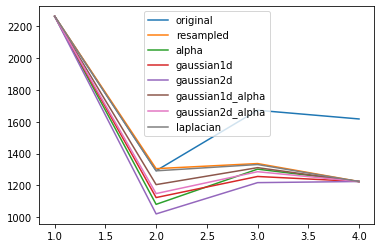

In [51]:
plt.plot([1, 2, 3, 4], res[1], label = 'original')
plt.plot([1, 2, 3, 4], res[0], label = 'resampled')
plt.plot([1, 2, 3, 4], res[5], label = 'alpha')
plt.plot([1, 2, 3, 4], res[7], label = 'gaussian1d')
plt.plot([1, 2, 3, 4], res[8], label = 'gaussian2d')
plt.plot([1, 2, 3, 4], res[6], label = 'gaussian1d_alpha')
plt.plot([1, 2, 3, 4], res[3], label = 'gaussian2d_alpha')
plt.plot([1, 2, 3, 4], res[4], label = 'laplacian')

plt.legend()

plt.savefig("./comparison")

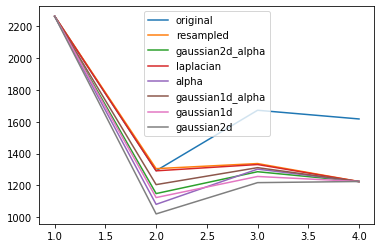

In [50]:
plt.plot([1, 2, 3, 4], res[1], label = 'original')
plt.plot([1, 2, 3, 4], res[0], label = 'resampled')
plt.plot([1, 2, 3, 4], res[3], label = 'gaussian2d_alpha')
plt.plot([1, 2, 3, 4], res[4], label = 'laplacian')
plt.plot([1, 2, 3, 4], res[5], label = 'alpha')
plt.plot([1, 2, 3, 4], res[6], label = 'gaussian1d_alpha')
plt.plot([1, 2, 3, 4], res[7], label = 'gaussian1d')
plt.plot([1, 2, 3, 4], res[8], label = 'gaussian2d')

plt.legend()